In [92]:
# import the necessary packages

import numpy as np
import pandas as pd
import geopandas as gpd
import json
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [93]:
# Shapely: Point, Line, Polygon
#Each country is made of points, which when connected become a polygon. 

## Example 1: Visualize the path of Hurricane Florence

usa = gpd.read_file("gz_2010_us_040_00_500k.json")
usa.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


In [94]:
type(usa)
# Geometry column has a polygon. Each row represents a state. It's a polygon of different points.

geopandas.geodataframe.GeoDataFrame

In [95]:
 type(usa.geometry)
# GeoSeries is used to create a map

geopandas.geoseries.GeoSeries

In [14]:
type(usa.STATE)
# Series is used to put information on top of a map

pandas.core.series.Series

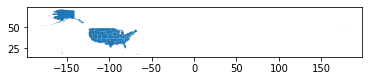

In [15]:
usa.plot()
# It will create the plot using Geoseries column. 

In [16]:
# Exclude Alaska and Hawaii

usa[usa['NAME'].isin(['Alaska','Hawaii'])]

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
19,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-164.97620 54.13459, -164.9377..."
29,0400000US15,15,Hawaii,,6422.628,"MULTIPOLYGON (((-171.73761 25.79210, -171.7223..."


In [17]:
usamap = usa[usa['NAME'].isin(['Alaska','Hawaii']) == False]
usamap.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


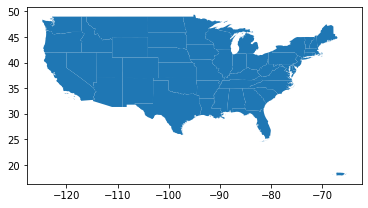

In [18]:
usamap.plot()

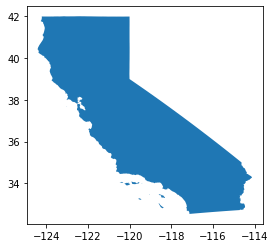

In [19]:
calimap = usa[usa['NAME'].isin(['California'])]
calimap.plot()

In [96]:
## Overlay the data from the storm history file to show the path of the hurricane
florence = pd.read_csv('stormhistory.csv')
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila
1,1A,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila
2,2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila
3,2A,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven
4,3,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven


In [97]:
type(florence)

pandas.core.frame.DataFrame

In [102]:
# Update the longtitude column to be negative because it is on the west side of Prime Meridian
florence['Long'] = florence['Long'] * -1

In [109]:
# Florence is not a geopandas GeoDataFrame, so we need to transform it

# Step 1: Combine the long and lat in a list, and call it coordinates
florence['coordinate'] = florence[['Long','Lat']].values.tolist()
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinate
0,1,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila,"[-18.4, 12.9]"
1,1A,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila,"[-19.0, 12.9]"
2,2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila,"[-19.4, 12.9]"
3,2A,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven,"[-20.4, 13.1]"
4,3,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven,"[-20.9, 13.2]"


In [23]:
# Step 2: Transform the coordinate column to a point data structure
## Point is a method in shapely package
florence['coordinate'] = florence['coordinate'].apply(Point)
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinate
0,1,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila,POINT (-18.4 12.9)
1,1A,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila,POINT (-19 12.9)
2,2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila,POINT (-19.4 12.9)
3,2A,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven,POINT (-20.4 13.1)
4,3,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven,POINT (-20.9 13.2)


In [24]:
# Step 3: Transform the DataFrame from a Pandas Dataframe into a Geopandas GeoDataFrame
florence = gpd.GeoDataFrame(florence, geometry = 'coordinate')
## It needs to find a column where you can find a shapely column.

In [25]:
type(florence.coordinate)

geopandas.geoseries.GeoSeries

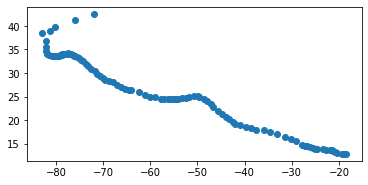

In [26]:
florence.plot()

C:\Users\imani\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


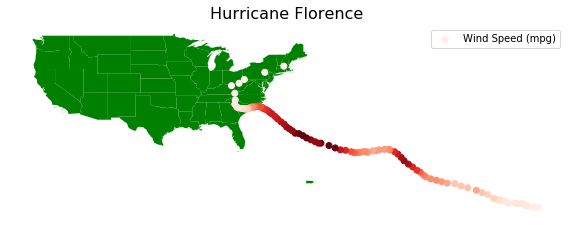

In [27]:
## Visualize the path on the map
fig, ax = plt.subplots(1, figsize = (10,7))
# plt.subplots will return two elements. Reference to the figure itself and a reference to the axis

base = usamap.plot(ax = ax, color = 'green')
florence.plot(ax = base, column = 'Wind', cmap = 'Reds', label = 'Wind Speed (mpg)')
ax.axis('off')
plt.legend()
plt.title('Hurricane Florence', fontsize = 16)
fig.show()

In [28]:
## Example 2: How to manipulate a legend
#json files are defined similar to a dictionary style

school_districts = gpd.read_file("school_districts.geojson")
school_districts.head()

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.76590 ..."
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ..."
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ..."


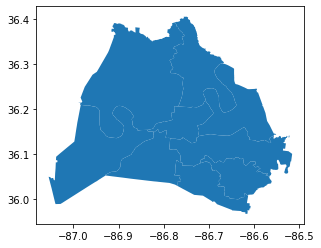

In [29]:
school_districts.plot()

In [30]:
type(school_districts)

geopandas.geodataframe.GeoDataFrame

In [31]:
legend_keywords = {'title' : 'Nashville School Districts',
                  'ncol':2,
                  'loc':'upper left',
                  'bbox_to_anchor': (1,1.03)}

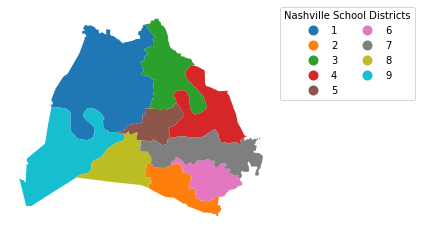

In [32]:
school_districts.plot(column = 'district', legend = True, legend_kwds = legend_keywords)
plt.axis('off')
plt.show()
# We want to take the legend outside the box

In [33]:
# Find the center of all districts
school_districts.centroid

0    POINT (-86.86087 36.26282)
1    POINT (-86.72361 36.28516)
2    POINT (-86.70156 36.03021)
3    POINT (-86.63964 36.19697)
4    POINT (-86.95428 36.10392)
5    POINT (-86.82739 36.08342)
6    POINT (-86.75215 36.16995)
7    POINT (-86.63366 36.04946)
8    POINT (-86.64296 36.10810)
dtype: geometry

In [34]:
# Find the area of al districts, this is area in degrees
school_districts.area

0    0.036641
1    0.014205
2    0.008328
3    0.014123
4    0.023030
5    0.010704
6    0.006415
7    0.007813
8    0.015004
dtype: float64

In [35]:
# Area is in degree square, which is not very easy to interpret,
# so we need to transform from degrees to meters. 
# We need to transform from degrees to metres
# CRS: coordinate reference system
# EPSG: European Petroleum Survey Group
# EPSG = 4326: units in degrees (used by Google Earth)
## EPSG = 3857: units in meters (used by google maps, bing maps, and open street maps)
school_districts.crs

{'init': 'epsg:4326'}

In [37]:
school_districts_meter = school_districts.to_crs(epsg = 3857)
school_districts_meter.crs

{'init': 'epsg:3857', 'no_defs': True}

In [39]:
school_districts_meter.area ## this area is in meter square
#school_districts.area ## this area is degree square

0    5.631344e+08
1    2.183699e+08
2    1.276154e+08
3    2.168715e+08
4    3.532321e+08
5    1.641375e+08
6    9.846963e+07
7    1.197423e+08
8    2.301357e+08
dtype: float64

In [43]:
## find the distance between the centers of the first two districts
district1 = school_districts_meter.centroid[0]
district2 = school_districts_meter.centroid[1]

district1.distance(district2)

15584.468101609416

In [48]:
## Choropleth Map
## Internet data
world = gpd.read_file('countries.geo.json')
internet_data = pd.read_csv('internet.csv') 

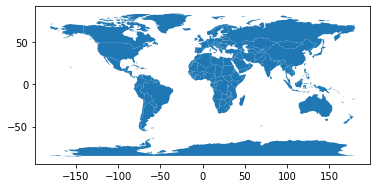

In [50]:
world.head()
world.plot()

In [53]:
world.head()

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


In [51]:
internet_data.head()

,Country Name,Country Code,2016
0,Aruba,ABW,93.542454
1,Afghanistan,AFG,11.200000
2,Angola,AGO,13.000000
3,Albania,ALB,66.363445
4,Andorra,AND,97.930637


In [57]:
## Merge the two dataframes into one
merged_data = world.merge(internet_data, left_on= 'id', right_on = 'Country Code')

merged_data.head()

,id,name,geometry,Country Name,Country Code,2016
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",Afghanistan,AFG,11.200000
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",Angola,AGO,13.000000
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509...",Albania,ALB,66.363445
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",United Arab Emirates,ARE,90.600007
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...",Argentina,ARG,70.968981


In [59]:
## drop the extra columns (Country Name and Country Code)

merged_data = merged_data.drop(columns = ["Country Name", "Country Code"])

In [60]:
merged_data.head()

,id,name,geometry,2016
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",11.200000
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...",13.000000
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509...",66.363445
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",90.600007
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000...",70.968981


<Figure size 432x288 with 0 Axes>

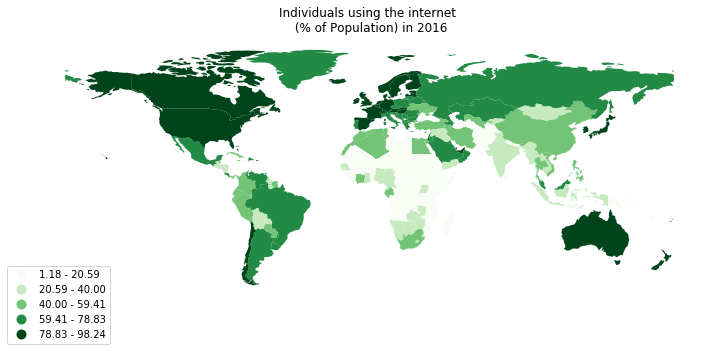

In [91]:
# Create the Choropleth map
# Darker color represents higher %age of population using internet

plt.figure()

merged_data.plot(column = '2016', 
                 cmap = 'Greens',
                 scheme = 'equal_interval',
                figsize = (12,10),
                legend = True)

ax = plt.gca()
ax.set_axis_off()
ax.set_title('Individuals using the internet \n (% of Population) in 2016')
ax.get_legend().set_bbox_to_anchor((0.12,0.14))
plt.show()

In [66]:
## Checks for missing observations in our dataset
merged_data.isna().sum()
# 2016 has two missing observations after the merge

id          0
name        0
geometry    0
2016        2
dtype: int64

In [68]:
# drop all rows with missing observations
merged_data = merged_data.dropna()

In [69]:
merged_data.isna().sum()

id          0
name        0
geometry    0
2016        0
dtype: int64